### <a name='0'></a> Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)

### <a name='1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$


### Przykład w kodzie:

### <a name='2'></a> Wygenerowanie danych

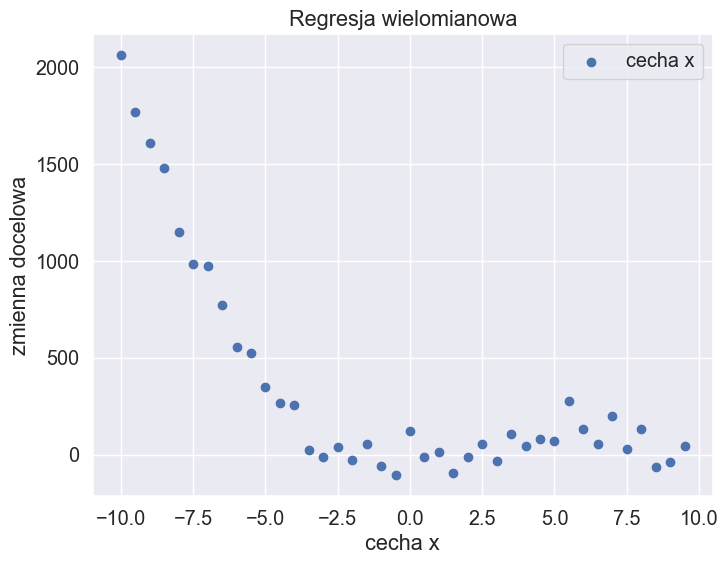

In [3]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

### Model liniowy:

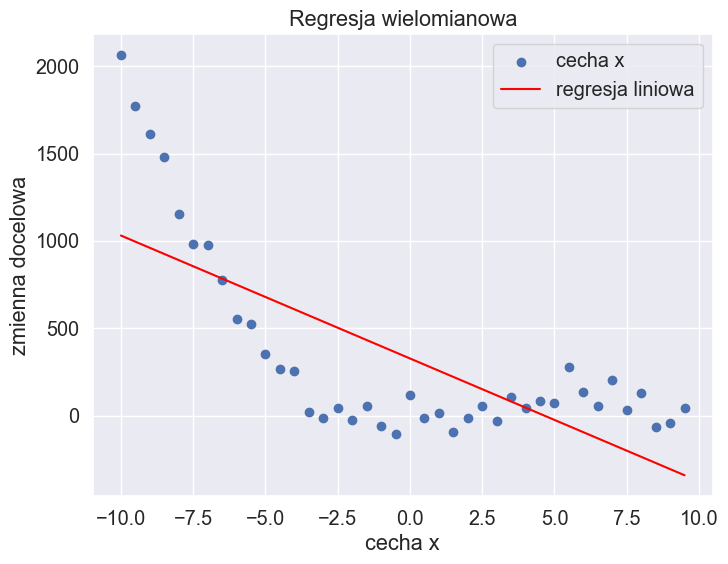

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

In [6]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head(10)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [8]:
X_poly.shape

(40, 3)

In [9]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


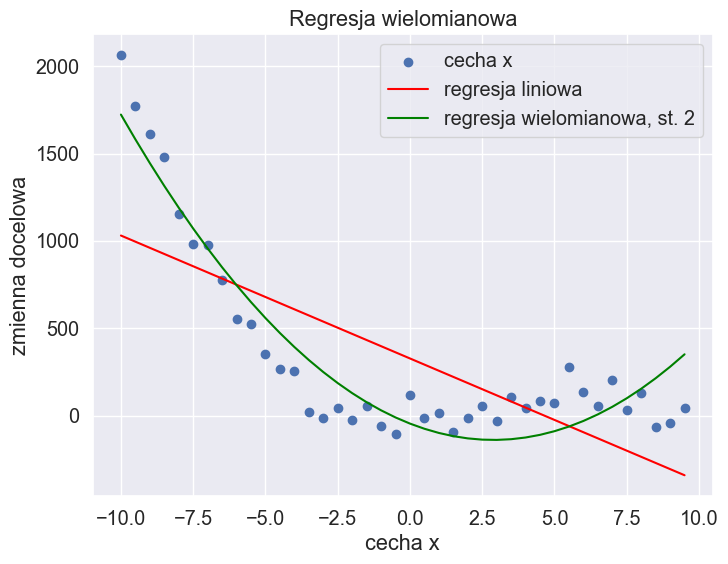

In [10]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [11]:
poly = PolynomialFeatures(degree=3)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

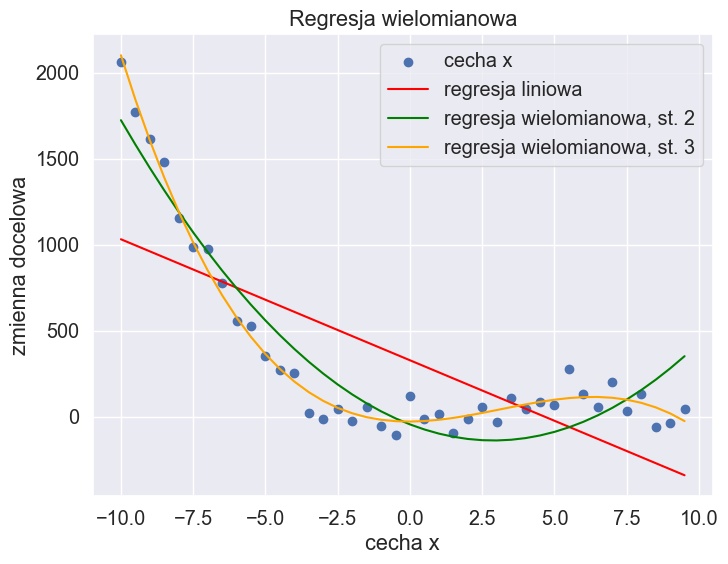

In [12]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [20]:
poly = PolynomialFeatures(degree=10)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[ 1.000000e+00, -1.000000e+01,  1.000000e+02, -1.000000e+03,
         1.000000e+04, -1.000000e+05,  1.000000e+06, -1.000000e+07,
         1.000000e+08, -1.000000e+09,  1.000000e+10],
       [ 1.000000e+00, -9.500000e+00,  9.025000e+01, -8.573750e+02,
         8.145062e+03, -7.737809e+04,  7.350919e+05, -6.983373e+06,
         6.634204e+07, -6.302494e+08,  5.987369e+09],
       [ 1.000000e+00, -9.000000e+00,  8.100000e+01, -7.290000e+02,
         6.561000e+03, -5.904900e+04,  5.314410e+05, -4.782969e+06,
         4.304672e+07, -3.874205e+08,  3.486784e+09],
       [ 1.000000e+00, -8.500000e+00,  7.225000e+01, -6.141250e+02,
         5.220062e+03, -4.437053e+04,  3.771495e+05, -3.205771e+06,
         2.724905e+07, -2.316169e+08,  1.968744e+09],
       [ 1.000000e+00, -8.000000e+00,  6.400000e+01, -5.120000e+02,
         4.096000e+03, -3.276800e+04,  2.621440e+05, -2.097152e+06,
         1.677722e+07, -1.342177e+08,  1.073742e+09],
       [ 1.000000e+00, -7.500000e+00,  5.625000e+0

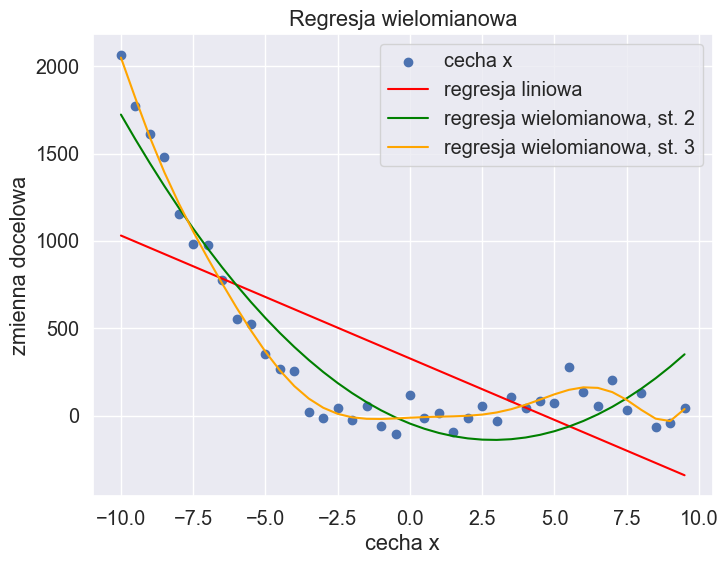

In [21]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()